In [1]:
# Dependencies
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Power Plant Map

In [ ]:
# Link:  https://hifld-geoplatform.opendata.arcgis.com/datasets/power-plants/data

In [5]:
# csv file variable assignments
power_plant_path = "data/Power_Plants.csv"

# Import csv files as dataframes
power_plant_df = pd.read_csv(power_plant_path)

power_plant_df.head()

,X,Y,OBJECTID,PLANT_CODE,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,...,COAL_USED,NGAS_USED,OIL_USED,NET_GEN,CAP_FACTOR,SUB_1,SUB_2,LINES,SOURCE_LAT,SOURC_LONG
0,-12738514.44,5241089.478,1,10504,AMALGAMATED SUGAR TWIN FALLS,2320 ORCHARD DRIVE EAST,TWIN FALLS,ID,83301,NOT AVAILABLE,...,71349,1281711,0,51971.0,0.69797,NOT AVAILABLE,NOT AVAILABLE,0,42.532549,-114.432022
1,-11892822.65,4749643.351,2,56566,CASTLE CREEK HYDROPLANT,1080 POWER PLANT ROAD,ASPEN,CO,81611,NOT AVAILABLE,...,0,0,0,0.0,0.00000,NOT AVAILABLE,NOT AVAILABLE,0,39.195008,-106.835044
2,-11891364.09,4773818.635,3,7458,RUEDI,14151 FRYING PAN ROAD,ASPEN,CO,81611,NOT AVAILABLE,...,0,0,0,22690.0,0.57560,NOT AVAILABLE,NOT AVAILABLE,0,39.363113,-106.821941
3,-11675620.47,5177330.119,4,6204,LARAMIE RIVER STATION,HWY 320,WHEATLAND,WY,82201,NOT AVAILABLE,...,6043605,0,37956,10282950.0,0.68646,LARAMIE RIVER,NOT AVAILABLE,3,42.109060,-104.883883
4,-11797385.53,5573440.885,5,8028,ARVADA,HWY 14,ARVADA,WY,82831,NOT AVAILABLE,...,0,2492,0,165.0,0.00126,UNKNOWN204352,NOT AVAILABLE,1,44.693776,-105.977717


In [6]:
power_plant_df['PLANT_CODE'].count()

11810

In [90]:
#Selected Columns
power_plant_brief_df = power_plant_df[['PLANT_CODE','NAME','TYPE','COAL_USED','NGAS_USED','OIL_USED','ADDRESS','CITY','STATE','ZIP','COUNTRY','LATITUDE','LONGITUDE',]]
power_plant_brief_df

# Some column rename
power_plant_brief_df = power_plant_brief_df.rename(columns={"PLANT_CODE": "Plant Code"})
power_plant_brief_df



,Plant Code,NAME,TYPE,COAL_USED,NGAS_USED,OIL_USED,ADDRESS,CITY,STATE,ZIP,COUNTRY,LATITUDE,LONGITUDE
0,10504,AMALGAMATED SUGAR TWIN FALLS,CONVENTIONAL STEAM COAL,71349,1281711,0,2320 ORCHARD DRIVE EAST,TWIN FALLS,ID,83301,USA,42.532549,-114.432022
1,56566,CASTLE CREEK HYDROPLANT,CONVENTIONAL HYDROELECTRIC,0,0,0,1080 POWER PLANT ROAD,ASPEN,CO,81611,USA,39.195008,-106.835044
2,7458,RUEDI,CONVENTIONAL HYDROELECTRIC,0,0,0,14151 FRYING PAN ROAD,ASPEN,CO,81611,USA,39.363113,-106.821941
3,6204,LARAMIE RIVER STATION,CONVENTIONAL STEAM COAL,6043605,0,37956,HWY 320,WHEATLAND,WY,82201,USA,42.109060,-104.883883
4,8028,ARVADA,NATURAL GAS FIRED COMBUSTION TURBINE,0,2492,0,HWY 14,ARVADA,WY,82831,USA,44.693776,-105.977717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,60487,"RIVER ROAD SOLAR, LLC",SOLAR PHOTOVOLTAIC,0,0,0,951 RIVER ROAD,COFIELD,NC,27922,USA,36.362326,-76.861892
11806,2720,BUCK,CONVENTIONAL STEAM COAL; NATURAL GAS FIRED COM...,0,35735577,0,1555 DUKEVILLE RD,SALISBURY,NC,28145,USA,35.707900,-80.375620
11807,56587,MINNESOTA BREEZE LLC,ONSHORE WIND TURBINE,0,0,0,28431 KING AVENUE,RUSHMORE,MN,56168,USA,43.583300,-95.778100
11808,62139,HUNEKE II CSG,SOLAR PHOTOVOLTAIC,0,0,0,45000 145TH AVENUE,ZUMBROTA,MN,55992,USA,44.295875,-92.735935


In [91]:
##Cleaning
#-------------------------------------

# Part-1: Get indexes where name column "TYPE" has value "NOT AVAILABLE"
indexNames = power_plant_brief_df[(power_plant_brief_df['TYPE'] == 'NOT AVAILABLE')].index
print(indexNames)

# Delete these row indexes from 
power_plant_brief_df.drop(indexNames, inplace=True)
#power_plant_brief_df

power_plant_brief_df["TYPE"].value_counts()


Int64Index([   74,    77,   102,   136,   186,   291,   355,   435,   476,
              479,
            ...
            10989, 10990, 10991, 10992, 10993, 10994, 10995, 10996, 10997,
            11804],
           dtype='int64', length=684)


SOLAR PHOTOVOLTAIC                                                                                      3585
CONVENTIONAL HYDROELECTRIC                                                                              1470
ONSHORE WIND TURBINE                                                                                    1253
PETROLEUM LIQUIDS                                                                                        856
NATURAL GAS FIRED COMBUSTION TURBINE                                                                     646
                                                                                                        ... 
CONVENTIONAL STEAM COAL; NATURAL GAS FIRED COMBUSTION TURBINE; NUCLEAR                                     1
CONVENTIONAL STEAM COAL; NATURAL GAS FIRED COMBUSTION TURBINE; PETROLEUM LIQUIDS; SOLAR PHOTOVOLTAIC       1
CONVENTIONAL STEAM COAL; PETROLEUM LIQUIDS; WOOD/WOOD WASTE BIOMASS                                        1
ALL OTHER; OTHER GA

In [92]:
# Plant TYPE determination
power_plant_brief_df['TYPE_Clear'] = pd.np.where(power_plant_brief_df.TYPE.str.contains("HYDROELECTRIC"), "HYDRO",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("NUCLEAR"), "NUCLEAR",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("GEOTHERMAL"), "GEO",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("WASTE"), "MSW",
                        pd.np.where((power_plant_brief_df.TYPE.str.contains("COAL")&power_plant_brief_df.TYPE.str.contains("GAS")&power_plant_brief_df.TYPE.str.contains("PETROLEUM")), "GAS/COAL/PET",
                        pd.np.where((power_plant_brief_df.TYPE.str.contains("COAL")&power_plant_brief_df.TYPE.str.contains("GAS")), "GAS/COAL",
                        pd.np.where((power_plant_brief_df.TYPE.str.contains("GAS")&power_plant_brief_df.TYPE.str.contains("PETROLEUM")), "GAS/PET",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("COAL"), "COAL",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("PETROLEUM "), "PET",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("SOLAR"), "SOLAR",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("WIND"), "WIND",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("GAS"), "GAS", "Other"))))))))))))
power_plant_brief_df


C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
C

,Plant Code,NAME,TYPE,COAL_USED,NGAS_USED,OIL_USED,ADDRESS,CITY,STATE,ZIP,COUNTRY,LATITUDE,LONGITUDE,TYPE_Clear
0,10504,AMALGAMATED SUGAR TWIN FALLS,CONVENTIONAL STEAM COAL,71349,1281711,0,2320 ORCHARD DRIVE EAST,TWIN FALLS,ID,83301,USA,42.532549,-114.432022,COAL
1,56566,CASTLE CREEK HYDROPLANT,CONVENTIONAL HYDROELECTRIC,0,0,0,1080 POWER PLANT ROAD,ASPEN,CO,81611,USA,39.195008,-106.835044,HYDRO
2,7458,RUEDI,CONVENTIONAL HYDROELECTRIC,0,0,0,14151 FRYING PAN ROAD,ASPEN,CO,81611,USA,39.363113,-106.821941,HYDRO
3,6204,LARAMIE RIVER STATION,CONVENTIONAL STEAM COAL,6043605,0,37956,HWY 320,WHEATLAND,WY,82201,USA,42.109060,-104.883883,COAL
4,8028,ARVADA,NATURAL GAS FIRED COMBUSTION TURBINE,0,2492,0,HWY 14,ARVADA,WY,82831,USA,44.693776,-105.977717,GAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,60487,"RIVER ROAD SOLAR, LLC",SOLAR PHOTOVOLTAIC,0,0,0,951 RIVER ROAD,COFIELD,NC,27922,USA,36.362326,-76.861892,SOLAR
11806,2720,BUCK,CONVENTIONAL STEAM COAL; NATURAL GAS FIRED COM...,0,35735577,0,1555 DUKEVILLE RD,SALISBURY,NC,28145,USA,35.707900,-80.375620,GAS/COAL
11807,56587,MINNESOTA BREEZE LLC,ONSHORE WIND TURBINE,0,0,0,28431 KING AVENUE,RUSHMORE,MN,56168,USA,43.583300,-95.778100,WIND
11808,62139,HUNEKE II CSG,SOLAR PHOTOVOLTAIC,0,0,0,45000 145TH AVENUE,ZUMBROTA,MN,55992,USA,44.295875,-92.735935,SOLAR


In [93]:
#TYPE for Fossil PPE
power_plant_brief_df.loc[(power_plant_brief_df['COAL_USED'] > 0)&(power_plant_brief_df['NGAS_USED'] > 0)&(power_plant_brief_df['OIL_USED'] > 0), 'TYPE_Clear_2'] = 'COAL/GAS/PET'  
power_plant_brief_df.loc[(power_plant_brief_df['COAL_USED'] > 0)&(power_plant_brief_df['NGAS_USED'] > 0)&(power_plant_brief_df['OIL_USED'] == 0), 'TYPE_Clear_2'] = 'COAL/GAS'
power_plant_brief_df.loc[(power_plant_brief_df['COAL_USED'] > 0)&(power_plant_brief_df['NGAS_USED'] == 0)&(power_plant_brief_df['OIL_USED'] > 0), 'TYPE_Clear_2'] = 'COAL/PET'
power_plant_brief_df.loc[(power_plant_brief_df['COAL_USED'] == 0)&(power_plant_brief_df['NGAS_USED'] > 0)&(power_plant_brief_df['OIL_USED'] > 0), 'TYPE_Clear_2'] = 'GAS/PET'
power_plant_brief_df.loc[(power_plant_brief_df['COAL_USED'] > 0)&(power_plant_brief_df['NGAS_USED'] == 0)&(power_plant_brief_df['OIL_USED'] == 0), 'TYPE_Clear_2'] = 'COAL'
power_plant_brief_df.loc[(power_plant_brief_df['COAL_USED'] == 0)&(power_plant_brief_df['NGAS_USED'] > 0)&(power_plant_brief_df['OIL_USED'] == 0), 'TYPE_Clear_2'] = 'GAS'
power_plant_brief_df.loc[(power_plant_brief_df['COAL_USED'] == 0)&(power_plant_brief_df['NGAS_USED'] == 0)&(power_plant_brief_df['OIL_USED'] > 0), 'TYPE_Clear_2'] = 'PET'

#Type for NO Fossil PPE: Solar, Wind etc.
power_plant_brief_df.loc[(power_plant_brief_df['COAL_USED'] == 0)&(power_plant_brief_df['NGAS_USED'] == 0)&(power_plant_brief_df['OIL_USED'] == 0), 'TYPE_Clear_2'] = power_plant_brief_df['TYPE_Clear']



#power_plant_brief_df.loc[df['TYPE_Clear_2'] != 'Bill', 'TYPE_Clear_2'] = 'Mismatch' 
power_plant_brief_df

,Plant Code,NAME,TYPE,COAL_USED,NGAS_USED,OIL_USED,ADDRESS,CITY,STATE,ZIP,COUNTRY,LATITUDE,LONGITUDE,TYPE_Clear,TYPE_Clear_2
0,10504,AMALGAMATED SUGAR TWIN FALLS,CONVENTIONAL STEAM COAL,71349,1281711,0,2320 ORCHARD DRIVE EAST,TWIN FALLS,ID,83301,USA,42.532549,-114.432022,COAL,COAL/GAS
1,56566,CASTLE CREEK HYDROPLANT,CONVENTIONAL HYDROELECTRIC,0,0,0,1080 POWER PLANT ROAD,ASPEN,CO,81611,USA,39.195008,-106.835044,HYDRO,HYDRO
2,7458,RUEDI,CONVENTIONAL HYDROELECTRIC,0,0,0,14151 FRYING PAN ROAD,ASPEN,CO,81611,USA,39.363113,-106.821941,HYDRO,HYDRO
3,6204,LARAMIE RIVER STATION,CONVENTIONAL STEAM COAL,6043605,0,37956,HWY 320,WHEATLAND,WY,82201,USA,42.109060,-104.883883,COAL,COAL/PET
4,8028,ARVADA,NATURAL GAS FIRED COMBUSTION TURBINE,0,2492,0,HWY 14,ARVADA,WY,82831,USA,44.693776,-105.977717,GAS,GAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,60487,"RIVER ROAD SOLAR, LLC",SOLAR PHOTOVOLTAIC,0,0,0,951 RIVER ROAD,COFIELD,NC,27922,USA,36.362326,-76.861892,SOLAR,SOLAR
11806,2720,BUCK,CONVENTIONAL STEAM COAL; NATURAL GAS FIRED COM...,0,35735577,0,1555 DUKEVILLE RD,SALISBURY,NC,28145,USA,35.707900,-80.375620,GAS/COAL,GAS
11807,56587,MINNESOTA BREEZE LLC,ONSHORE WIND TURBINE,0,0,0,28431 KING AVENUE,RUSHMORE,MN,56168,USA,43.583300,-95.778100,WIND,WIND
11808,62139,HUNEKE II CSG,SOLAR PHOTOVOLTAIC,0,0,0,45000 145TH AVENUE,ZUMBROTA,MN,55992,USA,44.295875,-92.735935,SOLAR,SOLAR


In [94]:
# Export file as a CSV, without the Pandas index, but with the header
merge_data_df_2.to_csv("data/us_plants_nvk.csv", index=False, header=True)

NameError: name 'merge_data_df_2' is not defined

In [95]:
# Fossit Type of Fuel 


# Plant TYPE determination
power_plant_brief_df['TYPE_Clear3'] = pd.np.where(power_plant_brief_df.TYPE.str.contains("HYDROELECTRIC"), "HYDRO",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("NUCLEAR"), "NUCLEAR",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("GEOTHERMAL"), "GEO",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("WASTE"), "MSW",
                        pd.np.where((power_plant_brief_df.TYPE.str.contains("COAL")&power_plant_brief_df.TYPE.str.contains("GAS")&power_plant_brief_df.TYPE.str.contains("PETROLEUM")), "FOSSIL",
                        pd.np.where((power_plant_brief_df.TYPE.str.contains("COAL")&power_plant_brief_df.TYPE.str.contains("GAS")), "FOSSIL",
                        pd.np.where((power_plant_brief_df.TYPE.str.contains("GAS")&power_plant_brief_df.TYPE.str.contains("PETROLEUM")), "FOSSIL",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("COAL"), "FOSSIL",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("PETROLEUM "), "FOSSIL",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("SOLAR"), "SOLAR",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("WIND"), "WIND",
                        pd.np.where(power_plant_brief_df.TYPE.str.contains("GAS"), "FOSSIL", "Other"))))))))))))
power_plant_brief_df


C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pand

,Plant Code,NAME,TYPE,COAL_USED,NGAS_USED,OIL_USED,ADDRESS,CITY,STATE,ZIP,COUNTRY,LATITUDE,LONGITUDE,TYPE_Clear,TYPE_Clear_2,TYPE_Clear3
0,10504,AMALGAMATED SUGAR TWIN FALLS,CONVENTIONAL STEAM COAL,71349,1281711,0,2320 ORCHARD DRIVE EAST,TWIN FALLS,ID,83301,USA,42.532549,-114.432022,COAL,COAL/GAS,FOSSIL
1,56566,CASTLE CREEK HYDROPLANT,CONVENTIONAL HYDROELECTRIC,0,0,0,1080 POWER PLANT ROAD,ASPEN,CO,81611,USA,39.195008,-106.835044,HYDRO,HYDRO,HYDRO
2,7458,RUEDI,CONVENTIONAL HYDROELECTRIC,0,0,0,14151 FRYING PAN ROAD,ASPEN,CO,81611,USA,39.363113,-106.821941,HYDRO,HYDRO,HYDRO
3,6204,LARAMIE RIVER STATION,CONVENTIONAL STEAM COAL,6043605,0,37956,HWY 320,WHEATLAND,WY,82201,USA,42.109060,-104.883883,COAL,COAL/PET,FOSSIL
4,8028,ARVADA,NATURAL GAS FIRED COMBUSTION TURBINE,0,2492,0,HWY 14,ARVADA,WY,82831,USA,44.693776,-105.977717,GAS,GAS,FOSSIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,60487,"RIVER ROAD SOLAR, LLC",SOLAR PHOTOVOLTAIC,0,0,0,951 RIVER ROAD,COFIELD,NC,27922,USA,36.362326,-76.861892,SOLAR,SOLAR,SOLAR
11806,2720,BUCK,CONVENTIONAL STEAM COAL; NATURAL GAS FIRED COM...,0,35735577,0,1555 DUKEVILLE RD,SALISBURY,NC,28145,USA,35.707900,-80.375620,GAS/COAL,GAS,FOSSIL
11807,56587,MINNESOTA BREEZE LLC,ONSHORE WIND TURBINE,0,0,0,28431 KING AVENUE,RUSHMORE,MN,56168,USA,43.583300,-95.778100,WIND,WIND,WIND
11808,62139,HUNEKE II CSG,SOLAR PHOTOVOLTAIC,0,0,0,45000 145TH AVENUE,ZUMBROTA,MN,55992,USA,44.295875,-92.735935,SOLAR,SOLAR,SOLAR


In [96]:
power_plant_brief_df["TYPE_Clear3"].value_counts()

FOSSIL     3899
SOLAR      3668
HYDRO      1567
WIND       1268
MSW         428
Other       152
GEO          79
NUCLEAR      65
Name: TYPE_Clear3, dtype: int64

In [10]:
# Export file as a CSV, without the Pandas index, but with the header
power_plant_brief_df.to_csv("all_power_plants/all_power_plants_nvk.csv", index=False, header=True)

In [12]:
power_plant_brief_df["TYPE_Clear"].count()

11126

In [ ]:
power_plant_brief_df["TYPE_Clear_2"].value_counts()

In [14]:
clean_power_plant_brief_df = power_plant_brief_df.dropna()

In [15]:
clean_power_plant_brief_df.count()

Plant Code      10996
NAME            10996
TYPE            10996
COAL_USED       10996
NGAS_USED       10996
OIL_USED        10996
ADDRESS         10996
CITY            10996
STATE           10996
ZIP             10996
COUNTRY         10996
LATITUDE        10996
LONGITUDE       10996
TYPE_Clear      10996
TYPE_Clear_2    10996
TYPE_Clear3     10996
dtype: int64

In [17]:
# Export file as a CSV, without the Pandas index, but with the header
clean_power_plant_brief_df.to_csv("power_plant_map/all_power_plants_nvk.csv", index=False, header=True)

In [ ]:
power_plant_brief_df

In [ ]:
#Calculation number of POWER PLANTS by Type: Fossil, Solar, Hydro, Wind etc.
# Note: Fossil = Gas, Pet, Coal

power_plant_brief_df_groupby = power_plant_brief_df.groupby(["Plant Code","TYPE_Clear3"])

#Reset Index
sum_types = power_plant_brief_df_groupby.count().reset_index()
sum_types

#Count Ammount of PP Types
number_types = sum_types.groupby(["TYPE_Clear3"])
amount_power_plant = number_types['NAME'].count()
amount_power_plant_df = pd.DataFrame({"Number_of_Power_Plants_of_Each_Type": amount_power_plant }).reset_index()
amount_power_plant_df

# Export file as a CSV, without the Pandas index, but with the header
#amount_power_plant_df.to_csv("all_power_plants/amount_pp_by_type.csv", index=False, header=True)

# US city population

In [ ]:
# https://data.world/gmoney/us-city-populations

In [97]:
# csv file variable assignments
us_city_populations_path = "data/US_City_Populations.csv"

# Import csv files as dataframes
us_city_populations_df = pd.read_csv(us_city_populations_path)

us_city_populations_df = us_city_populations_df[["State", "City","Population"]]
us_city_populations_df.dropna()
us_city_populations_df

,State,City,Population
0,Alabama,Abernant,7599
1,Alabama,Alabaster,31545
2,Alabama,Albertville,21458
3,Alabama,Alexander City,14849
4,Alabama,Andalusia,9081
...,...,...,...
6884,Wyoming,Lander,7642
6885,Wyoming,Torrington,6736
6886,Wyoming,Douglas,6423
6887,Wyoming,Powell,6407


In [98]:
#City name in all Capital
us_city_populations_df['CITY'] = us_city_populations_df["City"].str.upper()
us_city_populations_df

,State,City,Population,CITY
0,Alabama,Abernant,7599,ABERNANT
1,Alabama,Alabaster,31545,ALABASTER
2,Alabama,Albertville,21458,ALBERTVILLE
3,Alabama,Alexander City,14849,ALEXANDER CITY
4,Alabama,Andalusia,9081,ANDALUSIA
...,...,...,...,...
6884,Wyoming,Lander,7642,LANDER
6885,Wyoming,Torrington,6736,TORRINGTON
6886,Wyoming,Douglas,6423,DOUGLAS
6887,Wyoming,Powell,6407,POWELL


In [99]:
#Sates Abbreviation
state_2 = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

#state_2 = {state: abbrev for abbrev, state in state_2.items()}

us_city_populations_df['STATE'] = us_city_populations_df['State'].map(state_2)
us_city_populations_df



,State,City,Population,CITY,STATE
0,Alabama,Abernant,7599,ABERNANT,AL
1,Alabama,Alabaster,31545,ALABASTER,AL
2,Alabama,Albertville,21458,ALBERTVILLE,AL
3,Alabama,Alexander City,14849,ALEXANDER CITY,AL
4,Alabama,Andalusia,9081,ANDALUSIA,AL
...,...,...,...,...,...
6884,Wyoming,Lander,7642,LANDER,WY
6885,Wyoming,Torrington,6736,TORRINGTON,WY
6886,Wyoming,Douglas,6423,DOUGLAS,WY
6887,Wyoming,Powell,6407,POWELL,WY


In [100]:
# Merging Power PLant Database with Population Database

merg_power_plant_city_population_df = pd.merge(power_plant_brief_df,us_city_populations_df, on=["STATE","CITY"])
merg_power_plant_city_population_df

,Plant Code,NAME,TYPE,COAL_USED,NGAS_USED,OIL_USED,ADDRESS,CITY,STATE,ZIP,COUNTRY,LATITUDE,LONGITUDE,TYPE_Clear,TYPE_Clear_2,TYPE_Clear3,State,City,Population
0,10504,AMALGAMATED SUGAR TWIN FALLS,CONVENTIONAL STEAM COAL,71349,1281711,0,2320 ORCHARD DRIVE EAST,TWIN FALLS,ID,83301,USA,42.532549,-114.432022,COAL,COAL/GAS,FOSSIL,Idaho,Twin Falls,46528
1,818,SHOSHONE FALLS,CONVENTIONAL HYDROELECTRIC,0,0,0,730 CANYON DRIVE,TWIN FALLS,ID,83301,USA,42.597349,-114.404317,HYDRO,HYDRO,HYDRO,Idaho,Twin Falls,46528
2,50987,ROCK CREEK I,CONVENTIONAL HYDROELECTRIC,0,0,0,CANYON SPRINGS ROAD,TWIN FALLS,ID,83301,USA,42.632480,-114.538770,HYDRO,HYDRO,HYDRO,Idaho,Twin Falls,46528
3,55007,K W COMPANY,CONVENTIONAL HYDROELECTRIC,0,0,0,1438 EASTLAND DRIVE NORTH,TWIN FALLS,ID,83301,USA,42.594830,-114.435300,HYDRO,HYDRO,HYDRO,Idaho,Twin Falls,46528
4,10809,ROCK CREEK II,CONVENTIONAL HYDROELECTRIC,0,0,0,3 MI W 2 MI N OF TWIN FALLS,TWIN FALLS,ID,83301,USA,42.620720,-114.531490,HYDRO,HYDRO,HYDRO,Idaho,Twin Falls,46528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,61869,SCENIC HILL SOLAR III,SOLAR PHOTOVOLTAIC,0,0,0,2525 WEST MAIN STREET,CLARKSVILLE,AR,72830,USA,35.467150,-93.515170,SOLAR,SOLAR,SOLAR,Arkansas,Clarksville,9391
5352,59691,GULF COAST SOLAR CENTER III,SOLAR PHOTOVOLTAIC,0,0,0,E FENCE ROAD,BELLVIEW,FL,32526,USA,30.470351,-87.335193,SOLAR,SOLAR,SOLAR,Florida,Bellview,23355
5353,61459,GEORGIA POWER AT SWAINSBORO,SOLAR PHOTOVOLTAIC,0,0,0,106 HIGHWAY 56 N,SWAINSBORO,GA,30401,USA,32.605495,-82.321247,SOLAR,SOLAR,SOLAR,Georgia,Swainsboro,7472
5354,61101,KU'IA SOLAR,SOLAR PHOTOVOLTAIC,0,0,0,TMK NO. (2) 4-6-018-003,LAHAINA,HI,96761,USA,20.885745,-156.657098,SOLAR,SOLAR,SOLAR,Hawaii,Lahaina,11704


In [101]:
#Cities with Power Plants by Fuel source
merg_power_plant_city_population_group = merg_power_plant_city_population_df.groupby(["TYPE_Clear3","City","State"])

list_city_population = merg_power_plant_city_population_group["Population"].median()

list_city_df = pd.DataFrame({"Population": list_city_population}).reset_index()
list_city_df



,TYPE_Clear3,City,State,Population
0,FOSSIL,Aberdeen,South Dakota,27800
1,FOSSIL,Abilene,Kansas,6590
2,FOSSIL,Adrian,Michigan,20840
3,FOSSIL,Agawam,Massachusetts,28616
4,FOSSIL,Akron,Ohio,197859
...,...,...,...,...
2883,WIND,Waverly,Iowa,10106
2884,WIND,Weatherford,Oklahoma,11989
2885,WIND,Wichita Falls,Texas,105114
2886,WIND,Woodward,Oklahoma,12963


# CO2 Emission

In [ ]:
#https://www.eia.gov/electricity/data/emissions/

In [2]:
# csv file variable assignments
co2_path = "data/emissions2019_co2.csv"

# Import csv files as dataframes
co2_df = pd.read_csv(co2_path)

co2_df

,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),Useful Thermal Output (MMBtu),...,Fuel Consumption for Electric Generation (MMBtu),\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region
0,1,Sand Point,AK,ELECTRIC POWER,2,IC,DFO,PET,2758000,0,...,28934,0,4967,Barrels,2333.38,2116.83,NaN,NaN,Balancing Authority Not Reported,Alaska
1,3,Barry,AL,ELECTRIC POWER,1,CA,NG,GAS,2824887000,0,...,1499638,0,1475594,Mcf,87728.21,79586.51,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
2,3,Barry,AL,ELECTRIC POWER,1,CT,NG,GAS,5306391000,0,...,55606180,0,54733332,Mcf,3252938.83,2951046.74,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
3,3,Barry,AL,ELECTRIC POWER,1,ST,BIT,COAL,4174904192,0,...,41521966,0,2045976,Tons,4270348.31,3874034.57,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
4,3,Barry,AL,ELECTRIC POWER,1,ST,NG,GAS,164624808,0,...,1662458,0,1615087,Mcf,97253.11,88227.45,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,63826,POET Biorefining - Jewell,IA,INDUSTRIAL,7,ST,NG,GAS,19608000,273441,...,223010,911468,1090844,Mcf,66366.50,60207.29,MRO,MISO,"Midcontinent Independent System Operator, Inc.",Midwest
5313,63829,"POET Biorefining - Marion, LLC",OH,INDUSTRIAL,7,ST,NG,GAS,30509000,476586,...,346988,1588619,1861160,Mcf,113232.22,102723.60,RFC,PJM,"PJM Interconnection, LLC",Mid-Atlantic
5314,63831,"POET Biorefining Caro, LLC",MI,INDUSTRIAL,7,ST,NG,GAS,17681160,114063,...,207313,380203,564919,Mcf,34369.45,31179.76,RFC,MISO,"Midcontinent Independent System Operator, Inc.",Midwest
5315,63832,"POET Biorefining-Hanlontown, LLC",IA,INDUSTRIAL,7,ST,NG,GAS,16792000,312492,...,190981,1041638,1185211,Mcf,72107.71,65415.68,MRO,MISO,"Midcontinent Independent System Operator, Inc.",Midwest


In [4]:
co2_df['Plant Code'].count()

5317

In [3]:
#Selected Columns
co2_df = co2_df[['Plant Code','Plant Name','Prime Mover','Fuel Code','State','Aggregated Fuel Group','Tons of CO2 Emissions','Fuel Consumption for Electric Generation (MMBtu)','Generation (kWh)']]
co2_df.dropna()
co2_df


,Plant Code,Plant Name,Prime Mover,Fuel Code,State,Aggregated Fuel Group,Tons of CO2 Emissions,Fuel Consumption for Electric Generation (MMBtu),Generation (kWh)
0,1,Sand Point,IC,DFO,AK,PET,2333.38,28934,2758000
1,3,Barry,CA,NG,AL,GAS,87728.21,1499638,2824887000
2,3,Barry,CT,NG,AL,GAS,3252938.83,55606180,5306391000
3,3,Barry,ST,BIT,AL,COAL,4270348.31,41521966,4174904192
4,3,Barry,ST,NG,AL,GAS,97253.11,1662458,164624808
...,...,...,...,...,...,...,...,...,...
5312,63826,POET Biorefining - Jewell,ST,NG,IA,GAS,66366.50,223010,19608000
5313,63829,"POET Biorefining - Marion, LLC",ST,NG,OH,GAS,113232.22,346988,30509000
5314,63831,"POET Biorefining Caro, LLC",ST,NG,MI,GAS,34369.45,207313,17681160
5315,63832,"POET Biorefining-Hanlontown, LLC",ST,NG,IA,GAS,72107.71,190981,16792000


In [4]:
#Fuel Group
co2_df["Aggregated Fuel Group"].value_counts()

GAS     2898
PET     1822
COAL     432
MSW      100
GEO       65
Name: Aggregated Fuel Group, dtype: int64

In [5]:
#GAS PPE

gas = co2_df.loc[co2_df["Aggregated Fuel Group"]=="GAS"]
gas_co2 = gas["Tons of CO2 Emissions"].sum()
print(gas_co2)

gas_fuel_consumption = gas["Fuel Consumption for Electric Generation (MMBtu)"].sum() 
print(gas_fuel_consumption)

gas_generation = gas["Generation (kWh)"].sum() 
print(gas_generation)

773878467.52
11995858699
1585716792369


In [6]:
#PET PPE

pet = co2_df.loc[co2_df["Aggregated Fuel Group"]=="PET"]
pet_co2 = pet["Tons of CO2 Emissions"].sum()
print(pet_co2)

pet_fuel_consumption = pet["Fuel Consumption for Electric Generation (MMBtu)"].sum() 
print(pet_fuel_consumption)

pet_generation = pet["Generation (kWh)"].sum() 
print(pet_generation)

22712523.23
197560752
18438175964


In [7]:
#COAL PPE

coal = co2_df.loc[co2_df["Aggregated Fuel Group"]=="COAL"]
coal_co2 = coal["Tons of CO2 Emissions"].sum()
print("CO2 emission (COAL):", coal_co2)

coal_fuel_consumption = coal["Fuel Consumption for Electric Generation (MMBtu)"].sum() 
print(coal_fuel_consumption)

coal_generation = coal["Generation (kWh)"].sum() 
print(coal_generation)

CO2 emission (COAL): 1088974609.39
10166223990
964956759540


In [ ]:
gas_generation/coal_generation
gas_fuel_consumption/coal_fuel_consumption

In [ ]:
geo = co2_df.loc[co2_df["Aggregated Fuel Group"]=="GEO"]
geo["Tons of CO2 Emissions"].sum()

In [ ]:
msw = co2_df.loc[co2_df["Aggregated Fuel Group"]=="MSW"]
msw["Tons of CO2 Emissions"].sum()

In [8]:
#Group by Fuel TYpe
ftype_group_df = co2_df.groupby(["Aggregated Fuel Group"])

#Purchase Count
ftypes_count = co2_df["Aggregated Fuel Group"].value_counts()

#average_purchase_price
co2_emission_ftype = ftype_group_df["Tons of CO2 Emissions"].sum()

#total_purchase_value
fuel_consumption_ftype = ftype_group_df["Fuel Consumption for Electric Generation (MMBtu)"].sum()

#total_purchase_value
e_generation_ftype = ftype_group_df["Generation (kWh)"].sum()

#avg_total_purchase_per_person
#avg_total_purchase_per_person_gender = total_purchase_gender / gender_count 

# #Display the summary data frame
finale_emission_df = pd.DataFrame({"Number of Power Plants": ftypes_count,
                                      "CO2 Emission (tons)": co2_emission_ftype,
                                      "Fuel Consumption (MMBtu)": fuel_consumption_ftype,
                                      "Energy Generated (kWh)": e_generation_ftype})
finale_emission_df


,Number of Power Plants,CO2 Emission (tons),Fuel Consumption (MMBtu),Energy Generated (kWh)
COAL,432,1.088975e+09,10166223990,964956759540
GAS,2898,7.738785e+08,11995858699,1585716792369
GEO,65,4.486769e+05,137769069,15472717000
MSW,100,1.478757e+07,262822087,14397109079
PET,1822,2.271252e+07,197560752,18438175964


In [9]:
# Export file as a CSV, without the Pandas index, but with the header
finale_emission_df.to_csv("data/co2_PieChart_nvk.csv", index=False, header=True)

In [10]:
# Polar Area
# https://www.chartjs.org/docs/latest/charts/polar.html

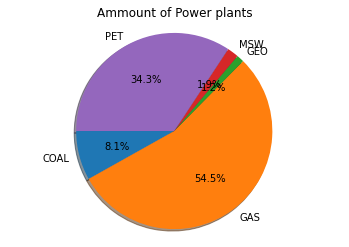

In [11]:
### Conclution #1 
### Amount of male players in 6 times higher than ammount of female players.

ftype_label = finale_emission_df.index

numbers = finale_emission_df['Number of Power Plants']

#colors = ["lightskyblue", "yellowgreen", "red"]
explode = (0, 0, 0, 0)

plt.title("Ammount of Power plants")
plt.pie(numbers, labels=ftype_label, 
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

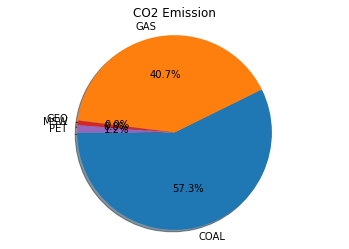

In [12]:
### Conclution #2 
### Amount of male players in 6 times higher than ammount of female players.

ftype_label = finale_emission_df.index

co2_em = finale_emission_df['CO2 Emission (tons)']

#colors = ["lightskyblue", "yellowgreen", "red"]
explode = (0, 0, 0, 0)

plt.title("CO2 Emission")
plt.pie(co2_em, labels=ftype_label, 
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

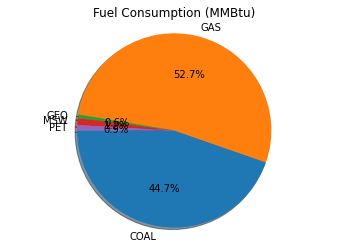

In [13]:
### Conclution #3
### Amount of male players in 6 times higher than ammount of female players.

ftype_label = finale_emission_df.index

fuel_cons = finale_emission_df['Fuel Consumption (MMBtu)']

#colors = ["lightskyblue", "yellowgreen", "red"]
explode = (0, 0, 0, 0)

plt.title("Fuel Consumption (MMBtu)")
plt.pie(fuel_cons, labels=ftype_label, 
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

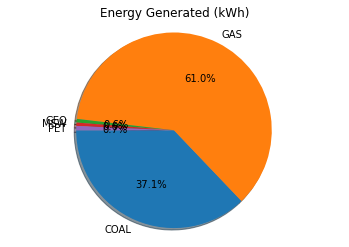

In [14]:
### Conclution #4
### Amount of male players in 6 times higher than ammount of female players.

ftype_label = finale_emission_df.index

e_gen = finale_emission_df['Energy Generated (kWh)']

#colors = ["lightskyblue", "yellowgreen", "red"]
explode = (0, 0, 0, 0)

plt.title("Energy Generated (kWh)")
plt.pie(e_gen, labels=ftype_label, 
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

In [ ]:
N = 5
ftype_count = finale_emission_df.index
co2_em = finale_emission_df['CO2 Emission (tons)']
fuel_cons = finale_emission_df['Fuel Consumption (MMBtu)']
e_gen = finale_emission_df['Energy Generated (kWh)']

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, ftype_count, width)
p2 = plt.bar(ind, fuel_cons, width, bottom=ftype_count)
p3 = plt.bar(ind, e_gen, width, bottom=fuel_cons)
p4 = plt.bar(ind, co2_em, width, bottom=e_gen)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('Coal', 'GAS', 'GEO', 'MSW', 'PET'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
co2_df['Plant Code'] = co2_df['Plant Code'].astype(str)
co2_df['Plant Code'].dtype


co2_df

In [ ]:
# Merging Emmision with Power Plant Map data
# Give us addresses (State, Cities, Coordinates) for each PPE and Datas about CO2 emmission, fuel consumption and electricity generation
# for the Fossil type of PPE

merge_data_df = pd.merge(co2_df,power_plant_brief_df, on=["Plant Code"])
merge_data_df

In [ ]:
# Group by 'Plant Code' and fuel type "Aggregated Fuel Group"
group_co2_df = co2_df.groupby(["Plant Code","Aggregated Fuel Group"])


sum_emission = group_co2_df['Tons of CO2 Emissions'].sum()
sum_fuel_consumption = group_co2_df['Fuel Consumption for Electric Generation (MMBtu)'].sum()
sum_generation = group_co2_df['Generation (kWh)'].sum()

#pd.set_option('display.max_rows', sum_emission.shape[0]+1)
#sum_emission

sum_emission_df = pd.DataFrame({    "Total of Tons of CO2 Emissions by fuel type": sum_emission, 
                                      "Total of Fuel Consumption for Electric Generation (MMBtu)": sum_fuel_consumption,
                                      "Total of Generation (kWh)": sum_generation})
#Addition Index column to DataFrame
sum_emission_df = sum_emission_df.reset_index()
sum_emission_df

In [ ]:
# Merging Emmision with Power Plant Map data
# Give us addresses (State, Cities, Coordinates) for each PPE and Datas about CO2 emmission, fuel consumption and electricity generation
# for the Fossil type of PPE

merge_data_df_2 = pd.merge(sum_emission_df,merg_power_plant_city_population_df, on=["Plant Code"])
merge_data_df_2

In [ ]:
# Export file as a CSV, without the Pandas index, but with the header
merge_data_df_2.to_csv("data/co2_nvk.csv", index=False, header=True)

In [ ]:
#group_by_city = merge_data_df_2.groupby(['CITY','STATE'])

#Group by City
group_by_city = merge_data_df_2.groupby(['CITY','STATE'])

#CO2 emission in the specific City by Fossil Power Plants
co2_emission_city = group_by_city["Total of Tons of CO2 Emissions by fuel type"].sum()

#total_purchase_value
fuel_consumption_city = group_by_city["Total of Fuel Consumption for Electric Generation (MMBtu)"].sum()

#total_purchase_value
e_generation_city = group_by_city["Total of Generation (kWh)"].sum()

#population in City
city_population = group_by_city["Population"].mean()

#avg_total_purchase_per_person
#avg_total_purchase_per_person_gender = total_purchase_gender / gender_count 

# #Display the summary data frame
finale_emission_city = pd.DataFrame({"CO2 Emission in the City (tons)": co2_emission_city,
                                     "Fuel Consumption in the City (MMBtu)": fuel_consumption_city,
                                      "Energy Generated in the City (kWh)": e_generation_city,
                                      "Population": city_population})

finale_emission_city_sort = finale_emission_city.sort_values(by=['CO2 Emission in the City (tons)'], ascending=False)

#Addition Index column to DataFrame
finale_emission_city_sort = finale_emission_city_sort.reset_index()
finale_emission_city_sort


In [ ]:
#Bar CHart Plotting
ax = finale_emission_city_sort.iloc[0:20].plot.bar(x='CITY', y='CO2 Emission in the City (tons)', rot=90)

ax2 = finale_emission_city_sort.iloc[0:20].plot.bar(x='CITY', y='Population', rot=90)

# I. Temperature Map

In [ ]:
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [12]:
# csv file variable assignments
temp_by_city_path = "data/GlobalLandTemperaturesByCity.csv"

# Import csv files as dataframes
temp_by_city_df = pd.read_csv(temp_by_city_path)
#google_rdf = pd.read_csv(google_path, encoding="ANSI")
#nyt_rdf = pd.read_csv(nyt_path, encoding="ISO-8859-1")

#goodreads_rdf.head()
#google_rdf.head()
temp_by_city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [13]:
#Removing ROWs with Nan data
temp_by_city_df_new = temp_by_city_df.dropna()
temp_by_city_df_new

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [ ]:
# Export file as a CSV, without the Pandas index, but with the header
temp_by_city_df_new.to_csv("data/temp_nvk.csv", index=False, header=True)

# I.I. Whole world Temperature vs Latitude/Longitude

In [ ]:
#Year extracting to separate column
temp_by_city_df_new['Year'] = pd.DatetimeIndex(temp_by_city_df_new['dt']).year

temp_by_city_df_new.head(3)

In [ ]:
# Data for last 20 years only
all_cities_years_20 = temp_by_city_df_new.loc[temp_by_city_df_new["Year"]>=1993]
#us_cities_years_20

#Group by year
all_cities_years_20 = all_cities_years_20.groupby(["City","Year","Latitude","Longitude"])
all_cities_years_20 = all_cities_years_20["AverageTemperature"].mean()
#lat_city = us_cities_years_20_group["My_Lat"].mean()
#long_city = us_cities_years_20_group["My_Long"].mean()

all_cities_years_20 = pd.DataFrame({"avg_temp_year": all_cities_years_20}).reset_index()
all_cities_years_20.head(3)

In [ ]:
# Temp difference between years
all_cities_years_20['temp_diff_df'] =  all_cities_years_20["avg_temp_year"].diff()
all_cities_years_20_clean = all_cities_years_20.dropna()

all_cities_years_20_clean

In [ ]:
#Long and Lat Conversion
all_cities_years_20_clean["New_Lat"]=all_cities_years_20_clean.Latitude.str.extract(r'(\d+.\d+)').astype('float')
#us_temp_city["New_Lat_Hemisphere"] = us_temp_city['Latitude'].str.strip().str[-1]
all_cities_years_20_clean.loc[all_cities_years_20_clean['Latitude'].str.strip().str[-1] == "N", 'My_Lat'] = all_cities_years_20_clean["New_Lat"]*1
all_cities_years_20_clean.loc[all_cities_years_20_clean['Latitude'].str.strip().str[-1] == "S", 'My_Lat'] = all_cities_years_20_clean["New_Lat"]*(-1)

all_cities_years_20_clean["New_Long"]=all_cities_years_20.Longitude.str.extract(r'(\d+.\d+)').astype('float')
#us_temp_city["New_Long_Hemisphere"] = us_temp_city['Longitude'].str.strip().str[-1]
all_cities_years_20_clean.loc[all_cities_years_20_clean['Longitude'].str.strip().str[-1] == "E", 'My_Long'] = all_cities_years_20_clean["New_Long"]*1
all_cities_years_20_clean.loc[all_cities_years_20_clean['Longitude'].str.strip().str[-1] == "W", 'My_Long'] = all_cities_years_20_clean["New_Long"]*(-1)

all_cities_drop = all_cities_years_20_clean.drop(columns=["New_Long", "New_Lat", "Latitude", "Longitude"])

all_cities_drop.head(3)

In [ ]:
#Avrg of temp_diff_df per City
avrg_temp_diff_for_20years_group = all_cities_drop.groupby(["City"])
avrg_temp_diff_for_20years = avrg_temp_diff_for_20years_group["temp_diff_df"].mean()
lat_city = avrg_temp_diff_for_20years_group["My_Lat"].mean()
long_city = avrg_temp_diff_for_20years_group["My_Long"].mean()
avrg_temp_diff_for_20years_df = pd.DataFrame({"avrg_temp_diff_for_20years": avrg_temp_diff_for_20years,
                                             "Latitude": lat_city,
                                         "Longitude": long_city}).reset_index()
avrg_temp_diff_for_20years_df

In [ ]:
#Latitude vs Temp. Changes
plt.scatter(avrg_temp_diff_for_20years_df['Latitude'],avrg_temp_diff_for_20years_df['avrg_temp_diff_for_20years'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Diff Temperature (C)',fontsize=(14));
#plt.xlim(-60,90)
plt.ylabel('avrg_temp_diff_for_20years (C)',fontsize=(12));
plt.xlabel('Latitude',fontsize=(12));

# Save the plotted figure as .pngs
#plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")

plt.show()

In [ ]:
#Longitude vs Temp. Changes
plt.scatter(avrg_temp_diff_for_20years_df['Longitude'],avrg_temp_diff_for_20years_df['avrg_temp_diff_for_20years'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Longitude vs. Diff Temperature (C)',fontsize=(14));
#plt.xlim(-60,90)
plt.ylabel('avrg_temp_diff_for_20years (C)',fontsize=(12));
plt.xlabel('Longitude',fontsize=(12));

# Save the plotted figure as .pngs
#plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")

plt.show()

# I.II. USA Only

In [14]:
us_temp_city = temp_by_city_df_new.loc[temp_by_city_df_new["Country"]=="United States"]

#Year extracting to separate column
#us_temp_city['Year'] = pd.DatetimeIndex(us_temp_city['dt']).year

us_temp_city.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W


In [15]:
#Year extracting to separate column
us_temp_city['Year'] = pd.DatetimeIndex(us_temp_city['dt']).year

us_temp_city.head(3)

C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820


In [33]:
#Long and Lat Conversion
us_temp_city["New_Lat"]=us_temp_city.Latitude.str.extract(r'(\d+.\d+)').astype('float')
#us_temp_city["New_Lat_Hemisphere"] = us_temp_city['Latitude'].str.strip().str[-1]
us_temp_city.loc[us_temp_city['Latitude'].str.strip().str[-1] == "N", 'My_Lat'] = us_temp_city["New_Lat"]*1
us_temp_city.loc[us_temp_city['Latitude'].str.strip().str[-1] == "S", 'My_Lat'] = us_temp_city["New_Lat"]*(-1)

us_temp_city["New_Long"]=us_temp_city.Longitude.str.extract(r'(\d+.\d+)').astype('float')
#us_temp_city["New_Long_Hemisphere"] = us_temp_city['Longitude'].str.strip().str[-1]
us_temp_city.loc[us_temp_city['Longitude'].str.strip().str[-1] == "E", 'My_Long'] = us_temp_city["New_Long"]*1
us_temp_city.loc[us_temp_city['Longitude'].str.strip().str[-1] == "W", 'My_Long'] = us_temp_city["New_Long"]*(-1)

us_temp_city_coords = us_temp_city.drop(columns=["New_Long", "New_Lat", "Latitude", "Longitude"])

us_temp_city_coords

C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Year,My_Lat,My_Long
47555,1820-01-01,2.101,3.217,Abilene,United States,1820,32.95,-100.53
47556,1820-02-01,6.926,2.853,Abilene,United States,1820,32.95,-100.53
47557,1820-03-01,10.767,2.395,Abilene,United States,1820,32.95,-100.53
47558,1820-04-01,17.989,2.202,Abilene,United States,1820,32.95,-100.53
47559,1820-05-01,21.809,2.036,Abilene,United States,1820,32.95,-100.53
...,...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544,0.281,Yonkers,United States,2013,40.99,-74.56
8439243,2013-06-01,20.892,0.273,Yonkers,United States,2013,40.99,-74.56
8439244,2013-07-01,24.722,0.279,Yonkers,United States,2013,40.99,-74.56
8439245,2013-08-01,21.001,0.323,Yonkers,United States,2013,40.99,-74.56


In [24]:
# Data for last 20 years only
us_cities_years_20 = us_temp_city_coords.loc[us_temp_city["Year"]>=1993]
#us_cities_years_20

#Group by year
us_cities_years_20_group = us_cities_years_20.groupby(["City","Year","My_Lat","My_Long"])
avg_temp_by_year_city = us_cities_years_20_group["AverageTemperature"].mean()
#lat_city = us_cities_years_20_group["My_Lat"].mean()
#long_city = us_cities_years_20_group["My_Long"].mean()

avg_temp_by_year_city_df = pd.DataFrame({"avg_temp_year": avg_temp_by_year_city}).reset_index()
avg_temp_by_year_city_df


,City,Year,My_Lat,My_Long,avg_temp_year
0,Abilene,1993,32.95,-100.53,16.675417
1,Abilene,1994,32.95,-100.53,17.631083
2,Abilene,1995,32.95,-100.53,17.302333
3,Abilene,1996,32.95,-100.53,17.589167
4,Abilene,1997,32.95,-100.53,16.581667
...,...,...,...,...,...
5392,Yonkers,2009,40.99,-74.56,10.141833
5393,Yonkers,2010,40.99,-74.56,11.357583
5394,Yonkers,2011,40.99,-74.56,11.272250
5395,Yonkers,2012,40.99,-74.56,11.971500


In [25]:
# Export file as a CSV, without the Pandas index, but with the header
avg_temp_by_year_city_df.to_csv("data/temp_usa_nvk.csv", index=False, header=True)

PermissionError: [Errno 13] Permission denied: 'data/temp_usa_nvk.csv'

In [32]:
avg_temp_by_year_city_df['temp_diff_df'] =  avg_temp_by_year_city_df["avg_temp_year"].diff()
avg_temp_by_year_city_df = avg_temp_by_year_city_df.dropna()

avg_temp_by_year_city_df

C:\Users\nvkar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,City,Year,My_Lat,My_Long,avg_temp_year,temp_diff_df
2,Abilene,1995,32.95,-100.53,17.302333,-0.328750
3,Abilene,1996,32.95,-100.53,17.589167,0.286833
4,Abilene,1997,32.95,-100.53,16.581667,-1.007500
5,Abilene,1998,32.95,-100.53,18.623833,2.042167
6,Abilene,1999,32.95,-100.53,18.257917,-0.365917
...,...,...,...,...,...,...
5392,Yonkers,2009,40.99,-74.56,10.141833,-0.499833
5393,Yonkers,2010,40.99,-74.56,11.357583,1.215750
5394,Yonkers,2011,40.99,-74.56,11.272250,-0.085333
5395,Yonkers,2012,40.99,-74.56,11.971500,0.699250


In [82]:
# Data for last 20 years only
us_cities_years_20 = us_temp_city_coords.loc[us_temp_city_coords["Year"].isin([1993, 2013])]
us_cities_years_20



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Year,My_Lat,My_Long
49631,1993-01-01,4.591,0.345,Abilene,United States,1993,32.95,-100.53
49632,1993-02-01,6.698,0.327,Abilene,United States,1993,32.95,-100.53
49633,1993-03-01,11.483,0.262,Abilene,United States,1993,32.95,-100.53
49634,1993-04-01,16.456,0.297,Abilene,United States,1993,32.95,-100.53
49635,1993-05-01,21.062,0.288,Abilene,United States,1993,32.95,-100.53
...,...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544,0.281,Yonkers,United States,2013,40.99,-74.56
8439243,2013-06-01,20.892,0.273,Yonkers,United States,2013,40.99,-74.56
8439244,2013-07-01,24.722,0.279,Yonkers,United States,2013,40.99,-74.56
8439245,2013-08-01,21.001,0.323,Yonkers,United States,2013,40.99,-74.56


In [83]:
#Group by year
us_cities_years_20_group = us_cities_years_20.groupby(["City","Year","My_Lat","My_Long"])
avg_temp_by_year_city = us_cities_years_20_group["AverageTemperature"].mean()
#lat_city = us_cities_years_20_group["My_Lat"].mean()
#long_city = us_cities_years_20_group["My_Long"].mean()

avg_temp_by_year_city_df = pd.DataFrame({"avg_temp_year": avg_temp_by_year_city}).reset_index()
print(avg_temp_by_year_city_df)

              City  Year  My_Lat  My_Long  avg_temp_year
0          Abilene  1993   32.95  -100.53      16.675417
1          Abilene  2013   32.95  -100.53      19.411111
2            Akron  1993   40.99   -80.95       9.996000
3            Akron  2013   40.99   -80.95      11.870667
4      Albuquerque  1993   34.56  -107.03      11.401167
..             ...   ...     ...      ...            ...
509  Winston Salem  2013   36.17   -79.56      16.231444
510      Worcester  1993   42.59   -72.00       7.835917
511      Worcester  2013   42.59   -72.00      10.375667
512        Yonkers  1993   40.99   -74.56      10.040917
513        Yonkers  2013   40.99   -74.56      12.163889

[514 rows x 5 columns]


# Temperature difference between 1993 and 2013

In [84]:
avg_temp_by_year_city_df_gr = avg_temp_by_year_city_df.groupby(["City"])

lat_city = avg_temp_by_year_city_df_gr["My_Lat"].mean()
long_city = avg_temp_by_year_city_df_gr["My_Long"].mean()
#print(long_city)

#Temp difference between 1993 and 2013
differ = avg_temp_by_year_city_df_gr["avg_temp_year"].diff().to_numpy()

#differ = differ[~np.isnan(differ)] # NAN removing from the Array differ
#print(differ)

#avrg_temp_diff = pd.DataFrame({'temp': differ,
#                             "Latitude": lat_city,
#                            "Longitude": long_city})
#avrg_temp_diff['temp_differ_1993_2013'] =  avg_temp_by_year_city_df_gr["avg_temp_year"].diff()

    
avg_temp_by_year_city_df['temp_dif_1993_2013'] = differ
temp_dif_1993_2013_df = avg_temp_by_year_city_df.dropna()
temp_dif_1993_2013_df


,City,Year,My_Lat,My_Long,avg_temp_year,temp_dif_1993_2013
1,Abilene,2013,32.95,-100.53,19.411111,2.735694
3,Akron,2013,40.99,-80.95,11.870667,1.874667
5,Albuquerque,2013,34.56,-107.03,13.630778,2.229611
7,Alexandria,2013,39.38,-76.99,14.187667,1.797250
9,Allentown,2013,40.99,-74.56,12.163889,2.122972
...,...,...,...,...,...,...
505,Wichita Falls,2013,34.56,-99.24,18.932556,2.903222
507,Windsor,2013,42.59,-82.91,10.897222,2.225556
509,Winston Salem,2013,36.17,-79.56,16.231444,1.314528
511,Worcester,2013,42.59,-72.00,10.375667,2.539750


In [51]:
avrg_temp_diff_for_20years_group = avg_temp_by_year_city_df.groupby(["City"])
avrg_temp_diff_for_20years = avrg_temp_diff_for_20years_group["temp_diff_df"].mean()
lat_city = avrg_temp_diff_for_20years_group["My_Lat"].mean()
long_city = avrg_temp_diff_for_20years_group["My_Long"].mean()
avrg_temp_diff_for_20years_df = pd.DataFrame({"avrg_temp_diff_for_20years": avrg_temp_diff_for_20years,
                                             "Latitude": lat_city,
                                         "Longitude": long_city}).reset_index()
avrg_temp_diff_for_20years_df

KeyError: 'Column not found: temp_diff_df'

In [ ]:
#Latitude vs Temp. Changes
plt.scatter(avrg_temp_diff_for_20years_df['Longitude'],avrg_temp_diff_for_20years_df['avrg_temp_diff_for_20years'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Diff Temperature (C)',fontsize=(14));
#plt.xlim(-60,90)
plt.ylabel('avrg_temp_diff_for_20years (C)',fontsize=(12));
plt.xlabel('Latitude',fontsize=(12));

# Save the plotted figure as .pngs
#plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")

plt.show()

In [ ]:
!pip install geopy

In [18]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
# Latitude & Longitude input 
Latitude = "32.95"
Longitude = "-100.53"
  
location = geolocator.reverse(Latitude+","+Longitude) 
  
# Display 
print(location)
address = location.raw['address'] 

#city = address.get('city', '') 
state = address.get('state', '') 
#country = address.get('country', '') 
#code = address.get('country_code') 
#zipcode = address.get('postcode') 
#print('City : ',city) 
print('State : ',state) 
#print('Country : ',country) 
#print('Zip Code : ', zipcode) 

In [ ]:
Latitude = avrg_temp_diff_for_20years_df["Longitude"].to_numpy()
Latitude[6]

In [86]:
# Latitude & Longitude input 
#Latitude = "32.95"
#Longitude = "-100.53"
Latitude = temp_dif_1993_2013_df["My_Lat"].to_numpy()
Longitude = temp_dif_1993_2013_df["My_Long"].to_numpy()

#State list
state_list = []


for i in range(len(Latitude)):
    try:
        lat = str(Latitude[i])
        lon = str(Longitude[i])
        print(lon,lat)
    #location = geolocator.reverse(lat+","+lon)
    #print(location)
    #address = location.raw['address']
        state = geolocator.reverse(lat+","+lon).raw['address'].get('state')
    #state = address.get('state')
        print("State: ", state)  
        state_list.append(state)
    except:
        state_list.append(np.nan)
        
        print("State not found. Skipping")
        pass

print(state_list)


 

-100.53 32.95
State:  Texas
-80.95 40.99
State:  Ohio
-107.03 34.56
State:  New Mexico
-76.99 39.38
State:  Maryland
-74.56 40.99
State:  New Jersey
-101.19 34.56
State:  Texas
-117.77 32.95
State not found. Skipping
-151.13 61.88
State:  Alaska
-82.91 42.59
State:  Michigan
-122.03 37.78
State:  California
-76.99 39.38
State:  Maryland
-96.7 32.95
State:  Texas
-76.99 39.38
State:  Maryland
-106.13 39.38
State:  Colorado
-83.68 34.56
State:  Georgia
-87.34 40.99
State:  Indiana
-104.05 39.38
State:  Colorado
-87.34 40.99
State:  Indiana
-97.85 29.74
State:  Texas
-119.34 36.17
State:  California
-76.99 39.38
State:  Maryland
-90.46 29.74
State:  Louisiana
-94.15 29.74
State:  Texas
-121.97 47.42
State:  Washington
-122.03 37.78
State:  California
-87.13 32.95
State:  Alabama
-72.0 42.59
State:  Massachusetts
-72.43 40.99
State:  New York
-96.72 26.52
State not found. Skipping
-78.55 42.59
State:  New York
-118.7 34.56
State:  California
-72.0 42.59
State:  Massachusetts
-82.39 26.52
S

In [87]:
#state_list_df = pd.DataFrame({"State": state_list})

#Adding values to DataFrame
temp_dif_1993_2013_df.insert(4, "State", state_list, True)
temp_dif_1993_2013_df.dropna()
temp_dif_1993_2013_df


,City,Year,My_Lat,My_Long,State,avg_temp_year,temp_dif_1993_2013
1,Abilene,2013,32.95,-100.53,Texas,19.411111,2.735694
3,Akron,2013,40.99,-80.95,Ohio,11.870667,1.874667
5,Albuquerque,2013,34.56,-107.03,New Mexico,13.630778,2.229611
7,Alexandria,2013,39.38,-76.99,Maryland,14.187667,1.797250
9,Allentown,2013,40.99,-74.56,New Jersey,12.163889,2.122972
...,...,...,...,...,...,...,...
505,Wichita Falls,2013,34.56,-99.24,Oklahoma,18.932556,2.903222
507,Windsor,2013,42.59,-82.91,Michigan,10.897222,2.225556
509,Winston Salem,2013,36.17,-79.56,North Carolina,16.231444,1.314528
511,Worcester,2013,42.59,-72.00,Massachusetts,10.375667,2.539750


In [102]:

merge_city_coords_temp_ppeType = pd.merge(list_city_df, temp_dif_1993_2013_df, on=["City","State"])
merge_city_coords_temp_ppeType




,TYPE_Clear3,City,State,Population,Year,My_Lat,My_Long,avg_temp_year,temp_dif_1993_2013
0,FOSSIL,Akron,Ohio,197859,2013,40.99,-80.95,11.870667,1.874667
1,MSW,Akron,Ohio,197859,2013,40.99,-80.95,11.870667,1.874667
2,FOSSIL,Albuquerque,New Mexico,557169,2013,34.56,-107.03,13.630778,2.229611
3,SOLAR,Albuquerque,New Mexico,557169,2013,34.56,-107.03,13.630778,2.229611
4,FOSSIL,Amarillo,Texas,197254,2013,34.56,-101.19,17.529556,2.865306
...,...,...,...,...,...,...,...,...,...
328,SOLAR,Plano,Texas,278480,2013,32.95,-96.70,20.450778,2.632944
329,SOLAR,Scottsdale,Arizona,230512,2013,32.95,-112.02,23.564556,2.363722
330,SOLAR,Simi Valley,California,126871,2013,34.56,-118.70,18.120667,1.757500
331,SOLAR,Vallejo,California,120228,2013,37.78,-122.03,16.233667,1.264750


In [121]:
# Export file as a CSV, without the Pandas index, but with the header
merge_city_coords_temp_ppeType.to_csv("corr_temp_fuelType/corr_temp_fuelType.csv", index=False, header=True)

<BarContainer object of 6 artists>

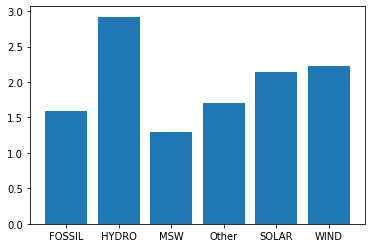

In [119]:
groups = merge_city_coords_temp_ppeType.groupby("TYPE_Clear3")
type_vs_temp = groups["temp_dif_1993_2013"].mean()
popul = groups["Population"].mean()

my_df = pd.DataFrame({"mean_temp_dif_by_type":type_vs_temp,
                     "mean_popul":popul})

type_vs_temp

plt.bar(my_df.index, my_df["mean_temp_dif_by_type"])


<BarContainer object of 6 artists>

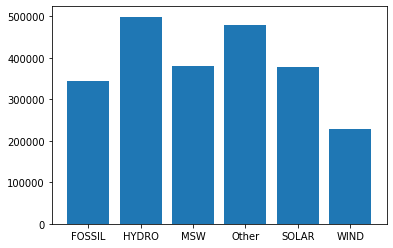

In [118]:
plt.bar(my_df.index, my_df["mean_popul"])

In [120]:
merge_city_coords_temp_ppeType['TYPE_Clear3'].value_counts()

FOSSIL    144
SOLAR      95
MSW        42
HYDRO      25
Other      14
WIND       13
Name: TYPE_Clear3, dtype: int64

In [ ]:
#
# Fossi-Mixture Type of Fuel 
# df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

fossil_mix_df = merge_city_coords_temp_ppeType

fossil_mix_df.loc[(fossil_mix_df['City'] == fossil_mix_df['City']) && (fossil_mix_df['State'] == fossil_mix_df['State'])]

merge_city_coords_temp_ppeType[merge_city_coords_temp_ppeType.columns[merge_city_coords_temp_ppeType['City'].iloc[0] == dmerge_city_coords_temp_ppeTypef['State'].iloc[1]]]
merge_city_coords_temp_ppeType



In [ ]:
# Export file as a CSV, without the Pandas index, but with the header
merge_city_coords_temp_ppeType.to_csv("avrg_tem_long_lat/avrg_tem_long_lat.csv", index=False, header=True)

# Correlation

In [122]:
# csv file variable assignments
power_plant_path = "corr_temp_fuelType/corr_temp_fuelType_CSV.csv"

# Import csv files as dataframes
temp_fuleType_fossilMix = pd.read_csv(power_plant_path)

temp_fuleType_fossilMix.head()

,TYPE_Clear3,City,State,Population,Year,My_Lat,My_Long,avg_temp_year,temp_dif_1993_2013,Unnamed: 9
0,FOSSIL,Akron,Ohio,197859,2013,40.99,-80.95,11.870667,1.874667,FOSSIL
1,FOSSIL,Albuquerque,New Mexico,557169,2013,34.56,-107.03,13.630778,2.229611,FOSSIL
2,FOSSIL,Amarillo,Texas,197254,2013,34.56,-101.19,17.529556,2.865306,FOSSIL
3,FOSSIL,Anchorage,Alaska,301010,2013,61.88,-151.13,1.018750,1.035667,FOSSIL
4,FOSSIL,Ann Arbor,Michigan,117770,2013,42.59,-82.91,10.897222,2.225556,FOSSIL


In [124]:
temp_fuleType_fossilMix['TYPE_Clear3'].value_counts()

FOSSIL    137
SOLAR      16
HYDRO       7
MSW         2
Other       2
WIND        1
Name: TYPE_Clear3, dtype: int64

<BarContainer object of 6 artists>

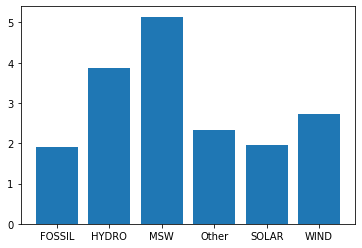

In [123]:
groups_2 = temp_fuleType_fossilMix.groupby("TYPE_Clear3")
type_vs_temp = groups_2["temp_dif_1993_2013"].mean()
popul = groups_2["Population"].mean()

my_df = pd.DataFrame({"mean_temp_dif_by_type":type_vs_temp,
                     "mean_popul":popul})

type_vs_temp

plt.bar(my_df.index, my_df["mean_temp_dif_by_type"])

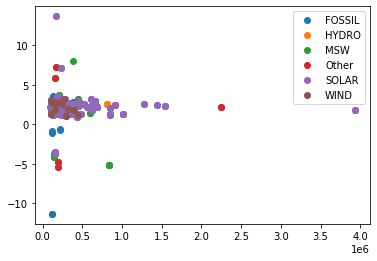

In [104]:
groups = merge_city_coords_temp_ppeType.groupby("TYPE_Clear3")
for name, group in groups:
    plt.plot(group["Population"], group["temp_dif_1993_2013"], marker="o", linestyle="", label=name)

plt.legend()

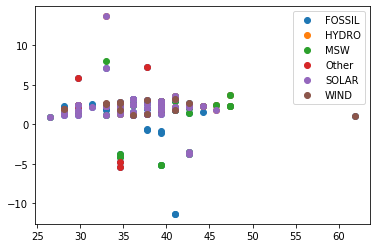

In [106]:
groups = merge_city_coords_temp_ppeType.groupby("TYPE_Clear3")
for name, group in groups:
    plt.plot(group["My_Lat"], group["temp_dif_1993_2013"], marker="o", linestyle="", label=name)

plt.legend()

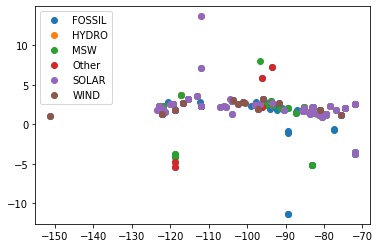

In [108]:
groups = merge_city_coords_temp_ppeType.groupby("TYPE_Clear3")
for name, group in groups:
    plt.plot(group["My_Long"], group["temp_dif_1993_2013"], marker="o", linestyle="", label=name)

plt.legend()

In [ ]:

# Export file as a CSV, without the Pandas index, but with the header
merge_city_coords_temp_ppeType.to_csv("avrg_tem_long_lat/avrg_tem_long_lat.csv", index=False, header=True)

In [ ]:

y_axis = merge_city_coords_temp_ppeType.loc[merge_city_coords_temp_ppeType["avrg_temp_diff_for_20years"]=="FOSSIL"]

fossil = plt.scatter(merge_city_coords_temp_ppeType['Latitude'],merge_city_coords_temp_ppeType['avrg_temp_diff_for_20years'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Diff Temperature (C)',fontsize=(14));
#plt.xlim(-60,90)
plt.ylabel('avrg_temp_diff_for_20years (C)',fontsize=(12));
plt.xlabel('Latitude',fontsize=(12));

# Save the plotted figure as .pngs
#plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")

#plt.legend(handles=[fahrenheit], loc="best")

plt.show()



In [ ]:
#y_axis = merge_city_coords_temp_ppeType.loc[merge_city_coords_temp_ppeType["avrg_temp_diff_for_20years"]=="WIND"]
fossil_df = merge_city_coords_temp_ppeType.groupby(["TYPE_Clear3"])



solar = plt.scatter(merge_city_coords_temp_ppeType['Latitude'],merge_city_coords_temp_ppeType['avrg_temp_diff_for_20years'],color = 'blue',s=20, facecolor = "steelblue", edgecolor = "black")
plt.title('City Latitude vs. Diff Temperature (C)',fontsize=(14));
#plt.xlim(-60,90)
plt.ylabel('avrg_temp_diff_for_20years (C)',fontsize=(12));
plt.xlabel('Latitude',fontsize=(12));

# Save the plotted figure as .pngs
#plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")

#plt.legend(handles=[fahrenheit], loc="best")

plt.show()